In [1]:
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

# Load BERT model

In [2]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"

# AdamW optimizer
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 4.9 MB 22.3 MB/s 
     |████████████████████████████████| 462 kB 51.3 MB/s 
     |████████████████████████████████| 1.8 MB 18.8 MB/s 
     |████████████████████████████████| 237 kB 25.0 MB/s 
     |████████████████████████████████| 92 kB 9.8 MB/s 
     |████████████████████████████████| 47.8 MB 60 kB/s 
     |████████████████████████████████| 99 kB 11.3 MB/s 
     |████████████████████████████████| 1.2 MB 61.4 MB/s 
     |████████████████████████████████| 596 kB 49.9 MB/s 
     |████████████████████████████████| 1.1 MB 61.7 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 352 kB 65.2 MB/s 


In [14]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

tf.get_logger().setLevel('ERROR')

## Choose a BERT model

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## Try it on an example

In [ ]:
text_test = ['buy viagra online!']

In [ ]:
# preprocessing layer
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess) 


text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_word_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [  101  4965  3081 17643  3784   999   102     0     0     0     0     0]
Input Mask : [1 1 1 1 1 1 1 0 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# BERT embeddings
bert_model = hub.KerasLayer(tfhub_handle_encoder)

bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
# pooled outputs can be viewed as an embedding for the entire email text.
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.9664391   0.9746456  -0.32650957  0.19395393  0.39227703  0.8972363
  0.9984455  -0.9972057  -0.24869354 -0.99771404 -0.14187759 -0.9493811 ]


In [ ]:
# setup a model with these layers
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.7657119]], shape=(1, 1), dtype=float32)


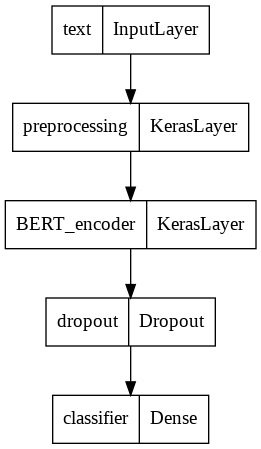

In [ ]:
tf.keras.utils.plot_model(classifier_model)

# Load data for training and validation

## Preparations

In [3]:
import json
import os

### Mount Google Drive with raw data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! ls /content/drive/MyDrive/Colab\ Notebooks/Spam_Detector/Enron_raw_data/dataset

test  test.csv	train  train.csv


### Install this project package from github

In [6]:
!rm -rf /content/spam_detector/
!git clone https://github.com/NataliaTarasovaNatoshir/spam_detector.git
%cd spam_detector/
!git pull origin master
!python setup.py install

Cloning into 'spam_detector'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 117 (delta 61), reused 82 (delta 26), pack-reused 0
Receiving objects: 100% (117/117), 16.52 KiB | 8.26 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/content/spam_detector
From https://github.com/NataliaTarasovaNatoshir/spam_detector
 * branch            master     -> FETCH_HEAD
Already up to date.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:502: UserWarning: The version specified ('') is an invalid version, this may not work as expected with newer versions of setuptools, pip, and PyPI. Please see PEP 440 for more details.
  "details." % version
running install
running bdist_egg
running egg_info
creating spam_detector.egg-info
writing spam_detector.egg-info/PKG-INFO
writing dependency_links to spam_detector.egg-info/dependency_links.txt
writing top-level names to spam_detector.egg-info/

In [7]:
# load config from package
with open("/content/spam_detector/spam_detector/config.json") as file:
  config = json.load(file)
config

{'dataset_build': {'raw_files_folder': '/content/drive/MyDrive/Colab Notebooks/Spam_Detector/Enron_raw_data/raw_files',
  'res_dataset_folder_name': '/content/drive/MyDrive/Colab Notebooks/Spam_Detector/Enron_raw_data/dataset',
  'test_share': 0.3},
 'testing': {'recall_level': 0.99}}

## Load train.csv

In [ ]:
import pandas as pd
dataset_folder = config['dataset_build']['res_dataset_folder_name']

dataset = pd.read_csv(os.path.join(dataset_folder, 'train.csv'))

dataset.head()

,subject,text,message_id,label
0,"oneok westex transmission interconnect , ward ...",we have finalized negotiations with oneok west...,3883.2001-07-03.lokay.ham.txt,0
1,fw : blank traveler ' s profile form,the travel profile . if you want to complete i...,3888.2001-07-05.lokay.ham.txt,0
2,allocation order,"michelle , to answer your question on the allo...",3896.2001-07-06.lokay.ham.txt,0
3,sporting clays reminder !,don ' t forget the nesa / hea 5 th annual spor...,3904.2001-07-09.lokay.ham.txt,0
4,enron cost savings guidelines,"effective , july 1 , 2001 , a number of measur...",3914.2001-07-12.lokay.ham.txt,0


In [ ]:
# fill empty values
dataset['text'].fillna('', inplace=True)
dataset['subject'].fillna('', inplace=True)

In [ ]:
# combine subject and text together
dataset['email_text'] = dataset[['subject', 'text']].apply(
    lambda x: str(x[0]) + ' ' + str(x[1]), axis=1)
dataset.head()

,subject,text,message_id,label,email_text
0,"oneok westex transmission interconnect , ward ...",we have finalized negotiations with oneok west...,3883.2001-07-03.lokay.ham.txt,0,"oneok westex transmission interconnect , ward ..."
1,fw : blank traveler ' s profile form,the travel profile . if you want to complete i...,3888.2001-07-05.lokay.ham.txt,0,fw : blank traveler ' s profile form the trave...
2,allocation order,"michelle , to answer your question on the allo...",3896.2001-07-06.lokay.ham.txt,0,"allocation order michelle , to answer your que..."
3,sporting clays reminder !,don ' t forget the nesa / hea 5 th annual spor...,3904.2001-07-09.lokay.ham.txt,0,sporting clays reminder ! don ' t forget the n...
4,enron cost savings guidelines,"effective , july 1 , 2001 , a number of measur...",3914.2001-07-12.lokay.ham.txt,0,"enron cost savings guidelines effective , july..."


## Convert pandas dataframe to a tf dataset

In [ ]:
# split dataset into training and validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(dataset[['email_text']], dataset['label'], test_size=0.33, random_state=42, shuffle=True)

In [ ]:
X_train.values.flatten()[1000]

"3 . 25 rate confirmation # 367886924 jb wed , 29 jun 2005 09 : 35 : 02 - 0800 hello , we sent you an email a while ago , because you now qualify for a much lower rate based on the biggest rate drop in years . you can now get $ 327 , 000 for as little as $ 617 a month ! bad credit ? doesn ' t matter , ^ low rates are fixed no matter what ! follow this link to process your application and a 24 hour approval : http : / / www . qrefi . net / ? id = al 7 best regards , shaun conrad http : / / www . qrefi . net / book . php "

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

BATCH_SIZE = 32
BUFFER_SIZE = 5000

train_ds = tf.data.Dataset.from_tensor_slices((X_train.values.flatten(), y_train.values))
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid.values.flatten(), y_valid.values))

train_ds = train_ds.shuffle(BUFFER_SIZE)
train_ds = train_ds.batch(BATCH_SIZE)
valid_ds = valid_ds.batch(BATCH_SIZE)

# PREFETCH

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Train the model

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
epochs = 1
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=valid_ds,
                               epochs=epochs)


Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
494/494 [==============================] - 4680s 9s/step - loss: 0.1205 - binary_accuracy: 0.9471 - val_loss: 0.0585 - val_binary_accuracy: 0.9802


In [ ]:
# save this model
saved_model_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Spam_Detector/models', 'raw_BERT')
classifier_model.save(saved_model_path, include_optimizer=False)

In [ ]:
valid_ds = tf.data.Dataset.from_tensor_slices(X_valid.values.flatten())
valid_ds = valid_ds.batch(BATCH_SIZE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
y_pred = tf.sigmoid(classifier_model.predict(valid_ds))

In [ ]:
from sklearn.metrics import roc_auc_score


roc_auc = roc_auc_score(y_valid.values, y_pred)
print("Transformers approach roc-auc score (validation dataset): {0:.4f}".format(roc_auc))

Transformers approach roc-auc score (validation dataset): 0.9980


# Performance assesment

## Build the model

In [8]:
from spam_detector.models import bert_model

In [9]:
small_bert = bert_model.BERTModel(model_name='small_bert', 
                             bert_model_name='small_bert/bert_en_uncased_L-4_H-512_A-8')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3
Model initiated successfully


In [10]:
import pandas as pd
dataset_folder = config['dataset_build']['res_dataset_folder_name']

dataset = pd.read_csv(os.path.join(dataset_folder, 'train.csv'))

dataset.head()

,subject,text,message_id,label
0,"oneok westex transmission interconnect , ward ...",we have finalized negotiations with oneok west...,3883.2001-07-03.lokay.ham.txt,0
1,fw : blank traveler ' s profile form,the travel profile . if you want to complete i...,3888.2001-07-05.lokay.ham.txt,0
2,allocation order,"michelle , to answer your question on the allo...",3896.2001-07-06.lokay.ham.txt,0
3,sporting clays reminder !,don ' t forget the nesa / hea 5 th annual spor...,3904.2001-07-09.lokay.ham.txt,0
4,enron cost savings guidelines,"effective , july 1 , 2001 , a number of measur...",3914.2001-07-12.lokay.ham.txt,0


In [12]:
small_bert.train(X=dataset[['message_id', 'subject', 'text']], y=dataset['label'], epochs=5)

Processing dataset for training
Preparing the model for training
Training the model
Epoch 1/5
738/738 [==============================] - 179s 229ms/step - loss: 0.0909 - binary_accuracy: 0.9746
Epoch 2/5
738/738 [==============================] - 169s 229ms/step - loss: 0.0219 - binary_accuracy: 0.9942
Epoch 3/5
738/738 [==============================] - 169s 229ms/step - loss: 0.0091 - binary_accuracy: 0.9978
Epoch 4/5
738/738 [==============================] - 168s 227ms/step - loss: 0.0036 - binary_accuracy: 0.9991
Epoch 5/5
738/738 [==============================] - 168s 227ms/step - loss: 0.0026 - binary_accuracy: 0.9993


In [13]:
# save the model to file
small_bert.dump(folder='/content/drive/MyDrive/Colab Notebooks/Spam_Detector/models')

Model saved to /content/drive/MyDrive/Colab Notebooks/Spam_Detector/models/small_bert


## Run an experiment on test data

In [14]:
from spam_detector import quality_assessment

In [15]:
results = quality_assessment.run_experiment(config=config, model_name='small_bert', 
                                            model=small_bert)

Testing model small_bert

Loading test dataset
Test dataset size = 10105 entries
Share of spam = 0.5090

Generating predictions
Processing dataset for prediction
Applying the model
Predictions generated

Total inference time: 0:00:34.709731
Inference time per 1000 entries: 0:00:03.434907

Binary classification metrics:
roc-auc score: 0.9987
At recall 0.9899 precision = 0.9903

Confusion matrix:
[[4912   50]
 [  52 5091]]


In [16]:
results

{'model_name': 'small_bert',
 'quality_metrics': {'precision': 0.9902742657070609,
  'recall': 0.9898891697452848,
  'roc_auc_score': 0.9986714899461848,
  'threshold': 0.9992536},
 'runtime': {'runtime_per_1000': datetime.timedelta(seconds=3, microseconds=434907),
  'total_runtime': datetime.timedelta(seconds=34, microseconds=709731)},
 'test_dataset': {'size': 10105, 'spam_share': 0.5089559623948541}}

## Check the model saved to file

In [17]:
# check that a model loaded from file behaves in the same way
new_model = bert_model.BERTModel(
    load_from_folder=True, folder='/content/drive/MyDrive/Colab Notebooks/Spam_Detector/models/small_bert')

Loading the model from /content/drive/MyDrive/Colab Notebooks/Spam_Detector/models/small_bert
Model loaded successfully


In [18]:
new_results = quality_assessment.run_experiment(config=config, 
                                                model_name=new_model.model_name, 
                                                model=new_model) 

Testing model small_bert

Loading test dataset
Test dataset size = 10105 entries
Share of spam = 0.5090

Generating predictions
Processing dataset for prediction
Applying the model
Predictions generated

Total inference time: 0:00:29.960862
Inference time per 1000 entries: 0:00:02.964954

Binary classification metrics:
roc-auc score: 0.9987
At recall 0.9899 precision = 0.9903

Confusion matrix:
[[4912   50]
 [  52 5091]]
